# Image augmention example
We use the Keras image generator for this

In [5]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import glob
from IPython.display import Image, display
#from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Pull an image down locally. Create the output directory

In [6]:
!wget -nc https://upload.wikimedia.org/wikipedia/commons/e/e3/Plains_Zebra_Equus_quagga.jpg
!wget -nc https://upload.wikimedia.org/wikipedia/commons/b/b6/Felis_catus-cat_on_snow.jpg
!rm -r -rf imageaugmentation
!mkdir -p imageaugmentation

File ‘Plains_Zebra_Equus_quagga.jpg’ already there; not retrieving.

File ‘Felis_catus-cat_on_snow.jpg’ already there; not retrieving.



## Reviewing what the image looks like

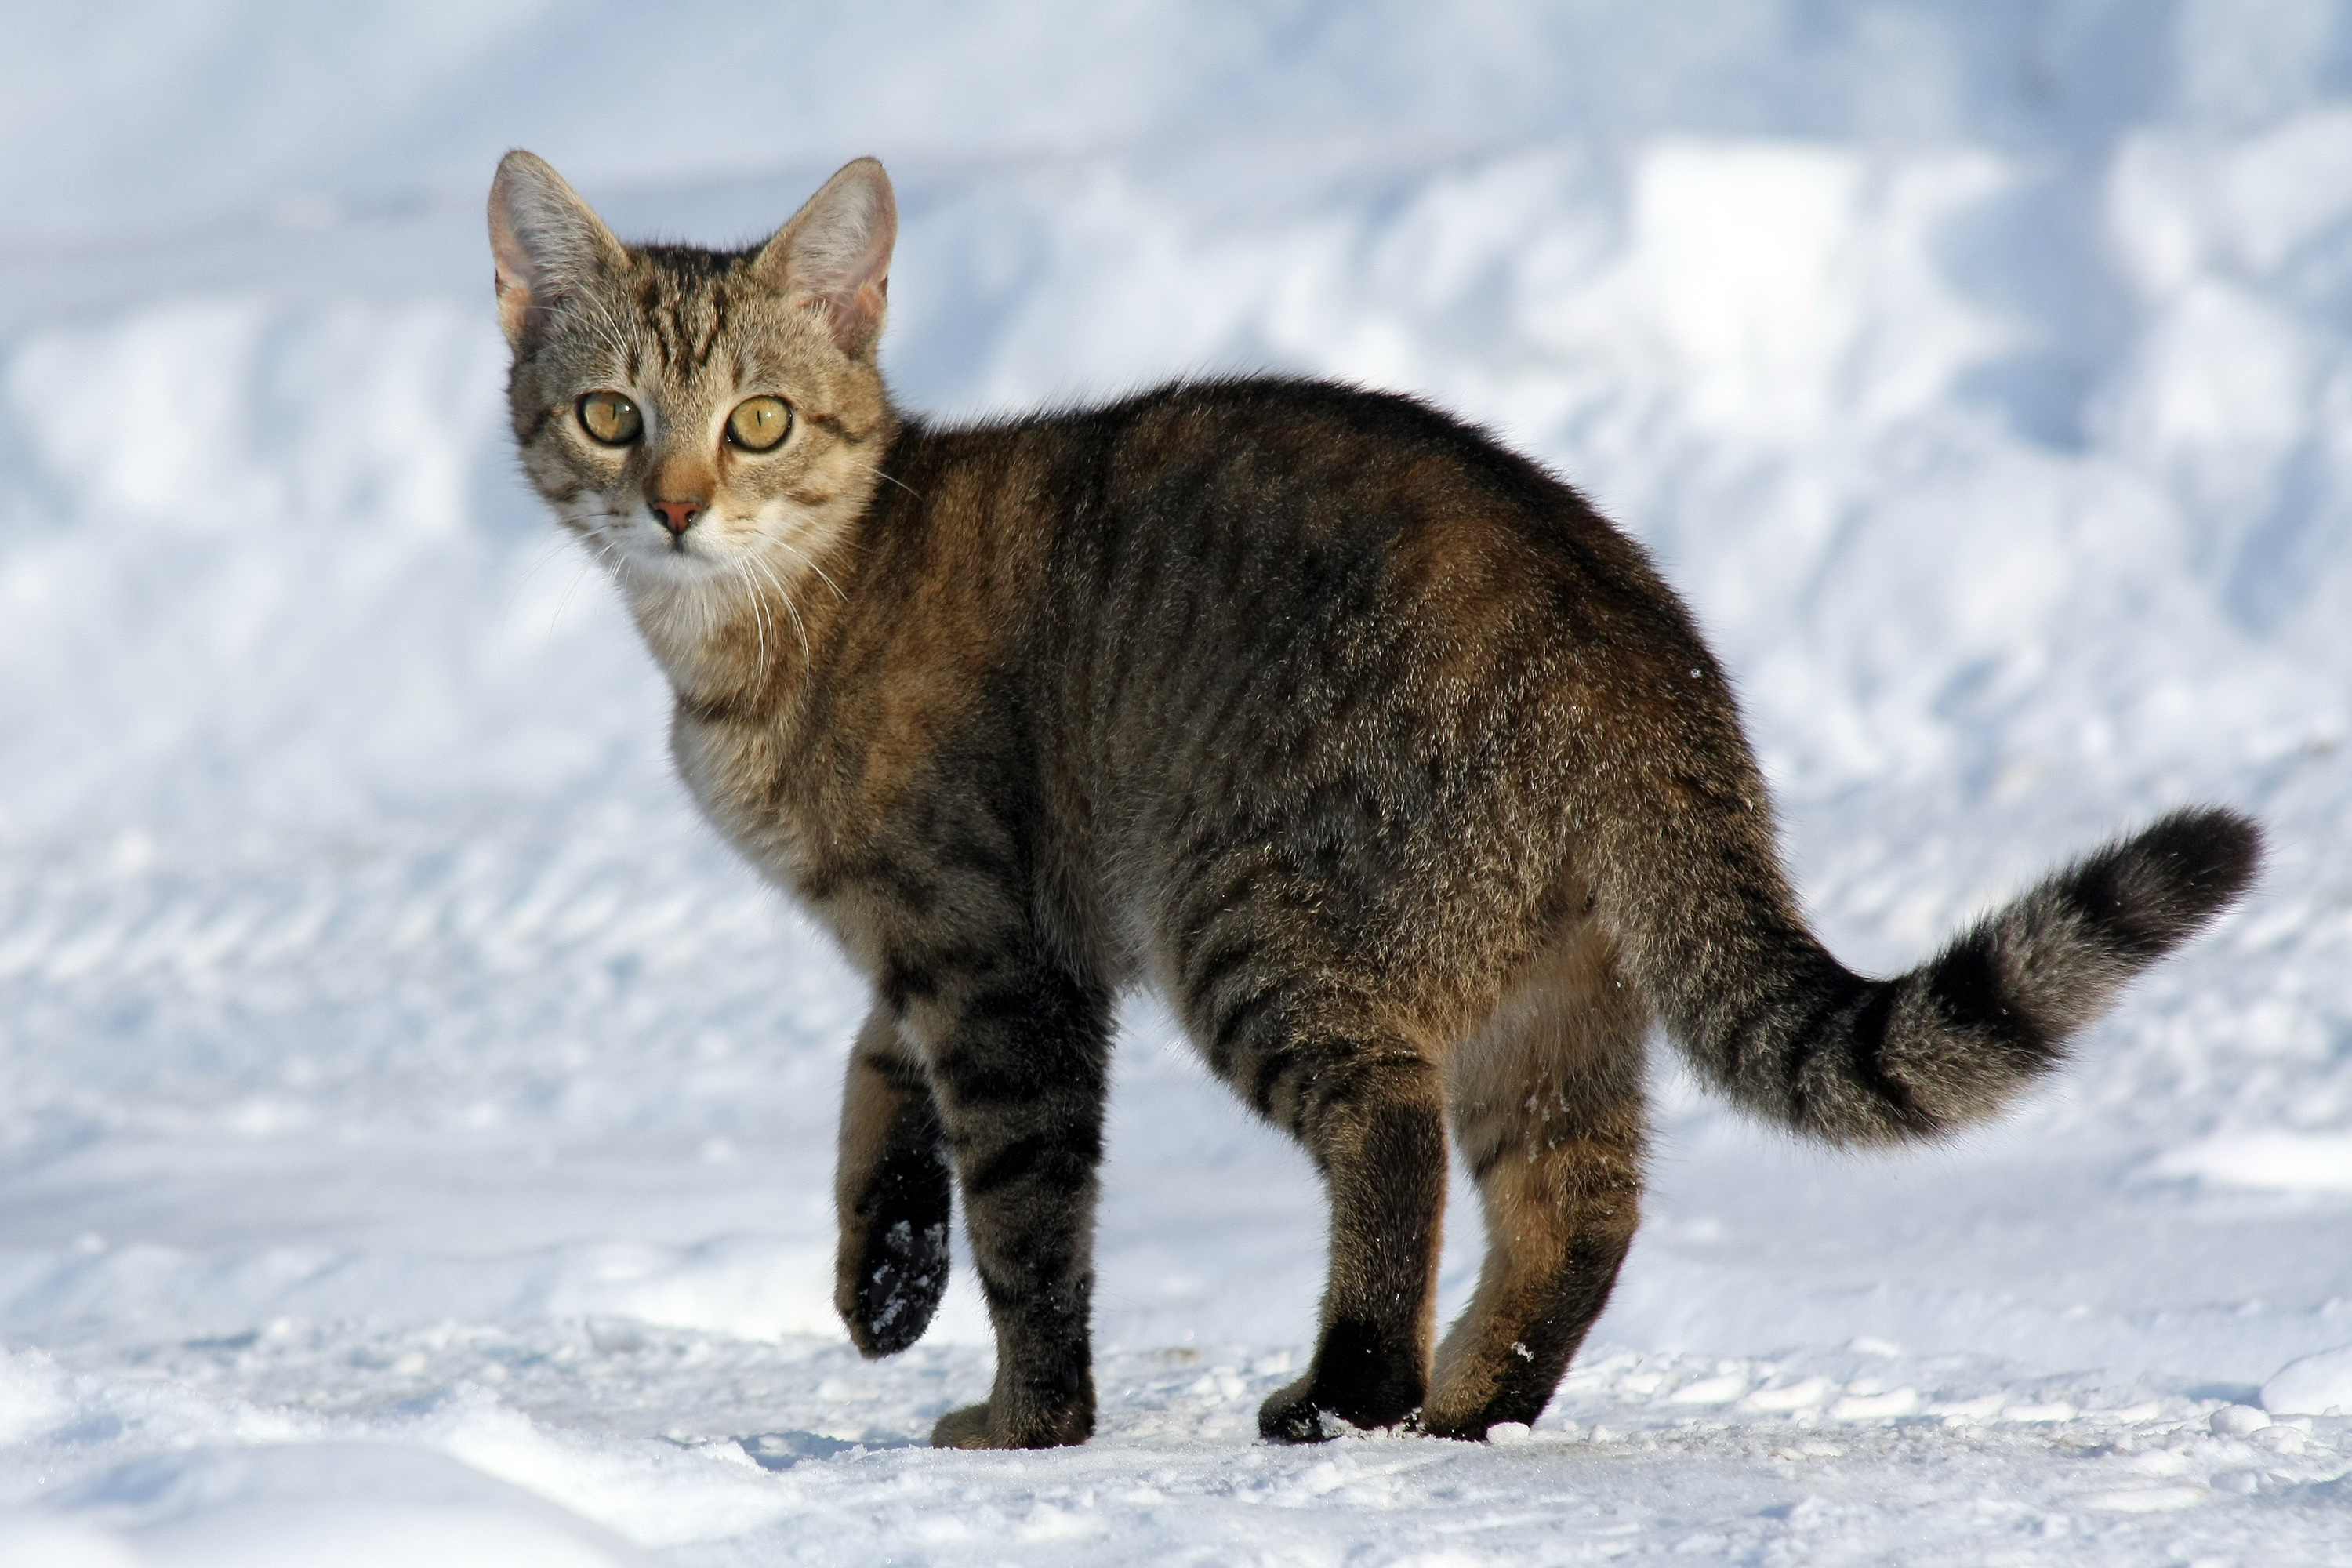

In [7]:
Image(filename='Felis_catus-cat_on_snow.jpg')

## Make the images 

In [8]:

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        #brightness_range=(1.0, 1.0)
        #zca_whitening = True,
        fill_mode='nearest')

img = load_img('Felis_catus-cat_on_snow.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='imageaugmentation', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 48:
        break  # otherwise the generator would loop indefinitely

## Get the images and put paths into a list

In [9]:
images = []
for img_path in glob.glob('imageaugmentation/*.jpeg'):
    images.append(mpimg.imread(img_path))
    if len(images) >= 48:
        break


## Display the images

48 6 8


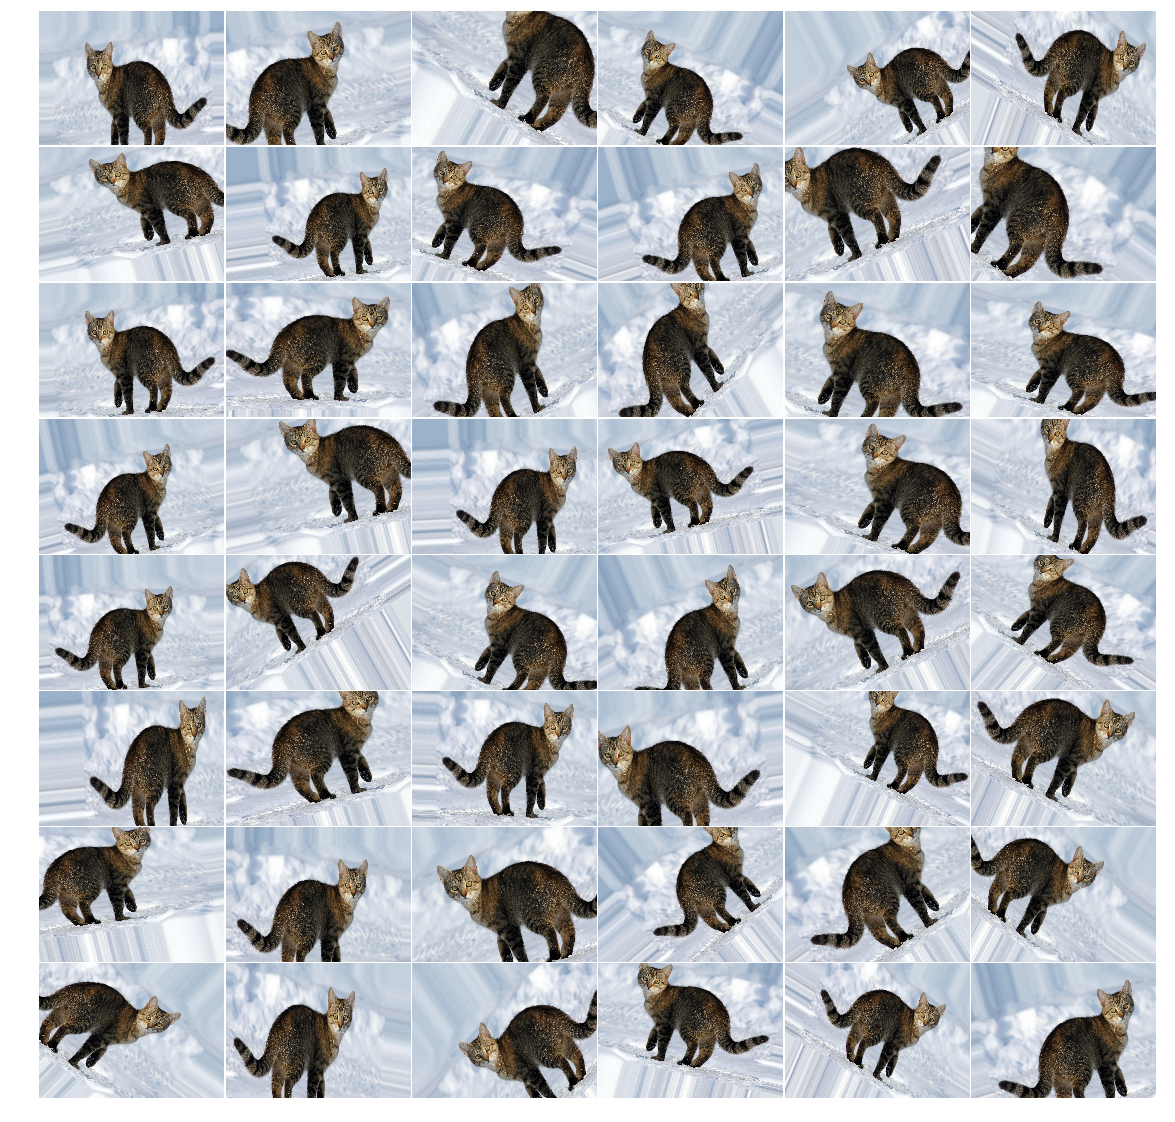

In [10]:
max_cols = 6
max_rows = int(len(images)/max_cols)
print(len(images), max_cols, max_rows)
fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,20))
for idx, image in enumerate(images):
    if idx >= max_cols*max_rows:
        break
    row = idx // max_cols
    col = idx % max_cols
    axes[row, col].axis("off")
    axes[row, col].imshow(image, cmap="gray", aspect="auto")
plt.subplots_adjust(wspace=.01, hspace=.01)
plt.show()